# Random Forest

In [1]:
#coding: utf-8
#source activate py38

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# Load the data from a CSV file
data = pd.read_csv(r'C:\Users\33670\Desktop\framework\data_collection\historical_data\strat1.csv')

In [4]:
# convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

In [5]:
data.shape

(27492, 15)

In [9]:
# là il faudra boucler sur les target_variable

# Split the data into training and testing sets
#df_X = data[['change_from_open', 'gap','pm_float_rotation)','sigma_percent','market_cap', 'pm_volume','number_of_red_candles_one_hour_before_open','percent_of_red_candles_one_hour_before_open','from_pm_high_to_open','pm_retracement']]
df_X = data[['ticker','above_20sma','above_50sma','green_days','red_days','from_pm_high_to_open','gap','market_cap','number_of_red_candles_one_hour_before_open','percent_of_red_candles_one_hour_before_open','pm_float_rotation','pm_dollar_volume','sigma_percent', 'strat1']]

# transform to numeric (or NaN)
df_X = df_X.apply(pd.to_numeric, errors='coerce')

# drop rows with NaN values // à voir si on la garde celle-là
#df_X = df_X.dropna(how='any', subset=df_X.columns)

il faut drop uniquement certaines colonnes importantes: gap, red_days, 


Filter #1

In [10]:
# filter on specific condition (gap > 4%)
#df_X = df_X[df_X['gap'] > 4]
#df_X['equal_or_above_4'] = df_X['equal_or_above_4'].astype(object)

df_X.shape

(0, 14)

In [7]:
# drop target column
y = df_X['equal_or_above_4']
df_X = df_X.drop('equal_or_above_4', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)

In [9]:
# Replace infinite updated data with nan
df_X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_X.dropna(inplace=True)
df_X = df_X[np.isfinite(df_X).all(1)]
df_X.tail(12)

,gap,pm_float_rotation),pm_volume,percent_of_red_candles_one_hour_before_open,from_pm_high_to_open,pm_retracement
77403,5.921053,0.000,1098.0,0.000000,-0.003096,0.052632
77425,4.586130,0.001,96936.0,0.111111,-0.010582,0.196078
77583,4.564061,0.000,223.0,0.000000,-0.006109,0.123439
77612,4.207489,0.000,170075.0,0.240000,-0.005231,0.115240
77640,5.120214,0.003,1552819.0,0.538462,-0.033961,0.419192
77656,13.013699,0.021,10703864.0,0.375000,-0.038665,0.258865
77732,4.024966,0.000,49117.0,0.230769,0.000000,0.000000
77828,4.229979,0.000,2485.0,0.166667,-0.006524,0.139276
77926,4.387846,0.000,247.0,0.000000,0.000046,-0.001100
78312,4.514364,0.000,8162.0,0.071429,-0.024266,0.365385


In [10]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Define the hyperparameter grid to search over

In [11]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [12]:
# Define the model to use
rf = RandomForestClassifier()

In [13]:
# Run the randomized search over the hyperparameter grid
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [14]:
# Print the best hyperparameters found by the search
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [16]:
y_pred

array(['False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'True', 'False', 'False',
       'False', 'False', 

In [17]:
from sklearn.metrics import accuracy_score
a_s = accuracy_score(y_test, y_pred)
print('accuracy_score: ', a_s)

accuracy_score:  0.7142857142857143


In [18]:
# Extract the feature importances
importances = best_model.feature_importances_

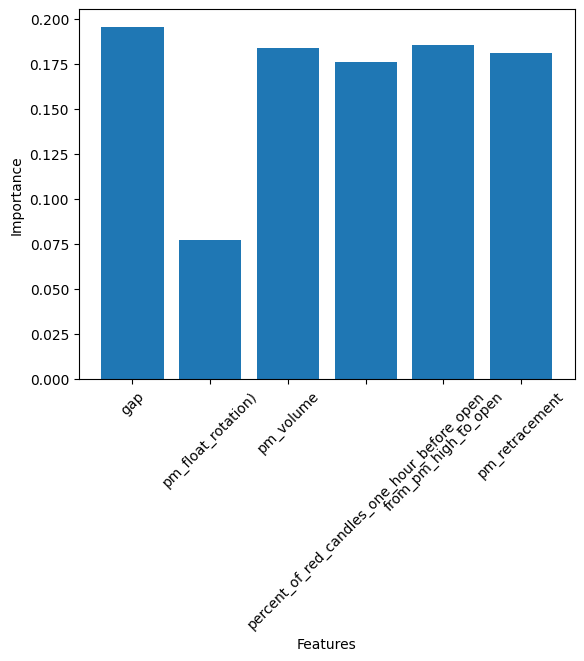

In [19]:
import matplotlib.pyplot as plt

# Plot the feature importances as a bar chart
plt.bar(df_X.columns, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [20]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
df_X.to_csv('gap_above_4.csv')

In [ ]:
d = {'y_test': y_test, 'y_pred': y_pred}
df = pd.DataFrame(data=d)
df.to_csv('pred.csv')